
<div class="alert alert-block alert-info"><b>Blogpost:</b> Food waste treatment in London 

By Gildas Ehrmann https://github.com/gildas84
</div>




## 0. Data gathering

### Step goal: Download and store the datasets used in this study.

### Step overview:

    London shape files
    London demographic data
    Wastedataflow volumes of organic waste collected by borough

All data is open access and can be found on the official websites. registration is required to obtain the dataset from wastedataflow


In [1]:
import requests, zipfile, io
from datetime import datetime
import os
import pandas as pd
import geopandas as gpd
from bs4 import BeautifulSoup as bs


### 1: London shape files

In [2]:


url = 'https://data.london.gov.uk/download/statistical-gis-boundary-files-london/9ba8c833-6370-4b11-abdc-314aa020d5e0/statistical-gis-boundaries-london.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
directory = "../data/raw/geometry/london/"
if not os.path.exists(directory):
    print(f'Succefully created new directory {directory}')
    os.makedirs(directory)
z.extractall(path=directory)

# retrieve the file gh file of london borou
fp = "../data/raw/geometry/london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)
map_df = map_df.sort_values(by='NAME', ascending=True)

### 2: London demographic data

In [3]:
# Retrieve population data for ach borough

url = 'https://data.london.gov.uk/download/land-area-and-population-density-ward-and-borough/77e9257d-ad9d-47aa-aeed-59a00741f301/housing-density-borough.csv'
Population = pd.read_csv(url, sep=',', skiprows=[1])


### 3: Wastedataflow.org data on organic waste by borough

In [4]:
# Retrieve the dataset (original data obatained from http://www.wastedataflow.org/)
dataset = pd.read_excel(r'https://github.com/gildas84/Food-Waste/blob/main/Food%20waste%20collected%20volumes.xlsx?raw=true', sheet_name='NotQ100', header=0, usecols=[0,1,2,3,4,5,6,7])


### Sources:

#### 1. London Datastore (2019). Statistical GIS Boundary Files for London. Retrieved from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

#### 2. Office for National Statistics (2019). Census Output Area population estimates – London, England (supporting information). Retrieved from https://data.london.gov.uk/download/land-area-and-population-density-ward-and-borough/77e9257d-ad9d-47aa-aeed-59a00741f301/housing-density-borough.csv
    
#### 3. Wastedataflow (2020). WasteDataFlow is the web based system for municipal waste data reporting by UK local authorities to government. Data available on http://www.wastedataflow.org/


## 1. Introduction: Motivation and scope of this work

Food waste may sound trivial, but it’s a cornerstone in tackling the global environment challenge we’re facing. The abundant and diverse food paradigm is driving deforestation, land-use change, soil alteration, biodiversity loss and water over-consumption. Food wasted is an unnecessary waste of these elements. The reliance of our food paradigm on food waste can no longer be ignored and even less accepted. Different solutions have been implemented. While tackling the size of our waste is necessary, other solutions acknowledge the difficulty (or the time needed) to reach a waste-free system by promoting the treatment and valorisation of the waste itself. We’ll focus here on the later

## 2. Food waste is massive

Roughly one-third of the edible parts of food produced for human consumption gets lost or wasted globally as per a 2011 FAO report entitled "Global food losses and food waste". The issue affects industrialized countries and developing countries in different ways. Production to retailing concentrates the majority of food waste volumes per capita in all regions worldwide and represents the vast majority of food waste in developing countries. But consumers represent a much larger share of food waste generated in Europe, Industrialised Asia,  North America and Oceania. While food waste from production to retailing stages are comparable in volume between regions (150 to 200 kg per year per capita) except in south and southeast asia, the volumes of food waste generated by consumers are significantly higher in  industrialized countries than in developing countries.


In [ ]:
import plotly.graph_objects as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# define the data:
data_FAO={'Region': ['Europe','North America <br>and Oceania','Industrialized <br>Asia','Sub-Saharan <br>Africa','North Africa, <br>West and <br>Central Asia','South and <br>Southeast Asia','Latin <br>America'], 
      'Production to retailing': ['187', '181', '165', '159', '181', '115', '198'], 
      'Consumer': ['94', '115', '70', '7', '31', '13', '24']}

data_FAO = pd.DataFrame(data_FAO)
data_FAO['Production to retailing'] = data_FAO['Production to retailing'].astype(float)
data_FAO['Consumer'] = data_FAO['Consumer'].astype(float)

data_FAO

# generate the graph

fig = go.Figure(data=[
    go.Bar(name='Production to retailing', x=data_FAO['Region'], y=data_FAO['Production to retailing'], marker_color='#336b87'),
    go.Bar(name='Consumer', x=data_FAO['Region'], y=data_FAO['Consumer'], marker_color='#762636')
])

fig.update_layout(barmode='stack')

fig.update_layout(
    title={
        'text': "Figure 1: Per capita food losses and waste at consumption <br>and pre-consumption stages, by regions",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    margin=dict(l=140, r=40, b=50, t=100),
    legend=dict(
        font_size=12,
        yanchor='middle',
        y=0.55,
        xanchor='left',
    ),
    width=1200,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',

)
fig.update_yaxes(
    title_text='Per capita food losses and waste<br>(kg/years)',
    gridcolor='black'
)

fig.update_xaxes(
    title_text='Source: <a href="https://www.fao.org/3/mb060e/mb060e00.pdf">FAO, 2011</a>',
    tickvals=[0, 1, 2, 3, 4 ,5 ,6]
)
fig.show()


Food waste is a global issue that impacts all geographic areas. The problem is identified in the Sustainable Development Goal <a href="https://sdgs.un.org/goals/goal12">#SDG12</a>, as defined by the United Nations General Assembly in 2015, which seeks to “ensure sustainable consumption and production patterns.” The third target under this goal (Target 12.3) calls for cutting in half per capita global food waste at the retail and consumer level by 2030.

At the UK level,  the <a href="https://wrap.org.uk/resources/report/courtauld-commitment-2025-annual-report-2020">2020 Courtauld Report</a> issued by Waste and Resources Action Programme (WRAP) estimates UK households wasted 6.6m tonnes of food in 2018, a 7% drop from 2015. Food waste is also a significant contributor to CO2 emissions (12.2 Mt in 2018). Under any considerations, consumers generate a significant share of food waste produced in the UK. 

## 3. Food waste is a systemic issue with local effects

Food waste is also a systemic issue, which stems from our modes of production, distribution and consumption.
A huge share of food ends up as waste and consumers' share is preponderant: 48% to 64% of food waste is generated by households continues the Courtauld report, the rest being generated by producers, manufacturers, retail and hospitality services. 


In [ ]:
import plotly.graph_objects as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go


test={'Region': ['Primary <br>Prodution', 'Manufacture', 'Retail', 'Hospitality & food <br>service', 'Households'], 
      'Volume': ['900', '1500','280', '1100', '6600'], 
      'Estimation': ['3500','0','0','0','0']}
test = pd.DataFrame(test)
test['Volume'] = test['Volume'].astype(float)
test['Estimation'] = test['Estimation'].astype(float)

animals=test['Region']

fig = go.Figure(data=[
    go.Bar(name='Volume', x=test['Region'], y=test['Volume'], marker_color='#336b87'),
    go.Bar(name='Estimation', x=test['Region'], y=test['Estimation'], marker_color='#90afc5')
])

# Change the bar mode
fig.update_layout(barmode='stack')


fig.update_layout(
    title={
        'text': "Figue 2: UK Fond waste in 2018 (ktons)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    margin=dict(l=140, r=40, b=50, t=100),
    legend=dict(
        font_size=12,
        yanchor='middle',
        y=0.55,
        xanchor='left',
    ),
    width=800,
    height=500,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',

)
fig.update_yaxes(
    title_text='volumes (kg tons)',
    gridcolor='black'
)

fig.update_xaxes(
    title_text='Source: Courtauld report',
    tickvals=[0, 1, 2, 3, 4]
)

fig.show()



Our food paradigm is geared towards the illusion of food profusion and the diversity and availability of choices. These objectives are achieved by our production and distribution system while generating large quantities of waste ahead of purchase. Without an economic disincentive to avoid structural food waste, public policy action is required.

Changing behaviours at the consumer level is both required and impactful independently of what must be required from production and distribution actors to tackle the issue. While it is estimated to cost UK households <a href="https://www.theguardian.com/environment/2020/jan/24/uk-households-waste-45m-tonnes-of-food-each-year">£14 billion a year</a>, food wasted only represents on average less than 60p a day per Briton: no wonder it goes unnoticed. But when considering it's 45 millions tonnes of food each year, it's difficult not to notice. That's potentially 45 millions tonnes of food each year local authorities have to handle. They have little grip on the issue but are on the frontline of managing the consequences. We'll look in more details at the toolkit available to local authorities to handle the issue. 

## Consequences of food waste

Food waste results in severe environmental, economic and societal impacts.

Environmental impacts include methane production from landfilling, as well as the upstream impacts of wasted agricultural land and cattle farming.
It represents a financial drain for local authorities, either by increasing further the volume of our general waste bin (with little upcycling potential beyond incineration), or by requiring dedicated collection and treatment facilities. Households ultimately pay for either through council taxes. The financial loss to householders wasting food is self-inflicted yet results from food consumption regime in place, which favours over-consumption and waste. That 'Buy 1 Get 1 Half-Price' offer sounds less appealing when you throw away half.

While food waste is generated by everyone's consumption habits, blaming individuals formaking rational consumption choices in the wake of available choices is at best unproductive. Addresing the food consumption regime generating this issue may be more appropriate.


## 4. How to handle the issue ?

The UK Department for Environment Food & Rural Affairs identifies 9 options to handle food waste and provided a  <a href="https://www.gov.uk/government/publications/food-and-drink-waste-hierarchy-deal-with-surplus-and-waste/food-and-drink-waste-hierarchy-deal-with-surplus-and-waste">hierarchy</a>. 


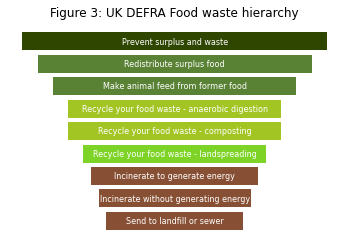

In [7]:
import matplotlib.pyplot as plt

# Define Data
pyramid={'grades': ["I","I","I","H","H","H","G","G","G","F","F","F","E","E","E","D","D","D","C","C","C","B","B","B","A","A","A"],
         'students': [-9, 0, 9, -10, 0, 10, -11, 0, 11,-12, 0, 12,-14, 0, 14,-14,0,14,-16, 0, 16,-18, 0, 18, -20, 0, 20],
         'colours': ['#874f33','#874f33','#874f33','#874f33','#874f33','#874f33','#874f33','#874f33','#874f33','#7DD427','#7DD427','#7DD427','#A2C523','#A2C523','#A2C523','#A2C523','#A2C523','#A2C523','#598234','#598234','#598234','#598234','#598234','#598234','#2E4600','#2E4600','#2E4600'],
         'names': ['','Send to landfill or sewer','','','Incinerate without generating energy','','','Incinerate to generate energy','','','Recycle your food waste - landspreading','','','Recycle your food waste - composting','','','Recycle your food waste - anaerobic digestion','','','Make animal feed from former food','','','Redistribute surplus food','','','Prevent surplus and waste','']}
pyramid = pd.DataFrame(pyramid)
pyramid.shape[1]
# Plot horizontal bar chart
bars = plt.barh(pyramid['grades'],pyramid['students'],color=pyramid['colours'])

# To get data labels
for y in range(0, pyramid.shape[0]):
    plt.text(0, pyramid["grades"].iloc[y], pyramid['names'].iloc[y],fontsize=8, color="white",horizontalalignment="center",verticalalignment="center")
    
# Define axes labels

plt.xlabel("Source: DEFRA")
plt.grid(False)
plt.title("Figure 3: UK DEFRA Food waste hierarchy")
plt.tick_params(left=False,
                bottom=False,
                labelleft=False)
plt.axis('off')
plt.show()



This hierarchy identifies better resource management practices and a more optimal distribution of resources as our best means to limiting surplus and waste. Addressing this systemic aspect of the problem requires a stream of regulations at national level.
The UK policy emphasizes behavioural solutions aiming to change behaviours through awareness campaigns like Love Food, hate Waste. At a local level, segregating food waste collection and charging collected volumes may help adjusting behaviours through an economic incentive.

From an operational perspective, the best option to tackle what cannot be prevented is an effective source segregation of organic waste. Local authorities can then choose between anaerobic digestion and composting.

The two techiniques are similar: composting is aerobic decomposition, i.e. it is the decomposition of organic matter in the presence of oxygen, while anaerobic digestion is the decomposition of organic matter without oxygen. Aerobic composting can be pursued in open air or through in-vessel composting (IVC). Both anaerobic digestion (AD) and aerobic composting (such as IVC) offer attractive features. The DEFRA hierarchy recognizes the complementarity of both techniques to handle processed food waste, raw food and green waste. The debate on which technique is more appropriate very much depends on the circumstances. AD allows to capture naturally forming (and potent) biogas while any forms of composting doesn't, but AD leaves aside green waste. In-vessel composting can be adapted to local authorities with a diverse mix of compostable matter, including processed food and green waste, but as AD, it requires industrial investments and creates economic actors whose very existence relies on our food paradigm's inefficiencies. Green and raw food composting are easily scalable and can be community-led, but don't help with processed food.

Landspreading usually involves food surplus and waste generated at the primary production stage and is regulated, in part because of nitrogen contamination.

The three last options do not require segregating food waste collection. By contaminating other materials, they reduce our ability to value the rest of our bin bag. Incineration with energy extraction is obviously better than without. Landfilling should be avoided as it generates potent gases like methane.

Solutions that consist of adding value to food waste, as adopted by many local authorities, are not directly helping towards achieving the SDG12 objective to reduce food waste produced. Instead, upcycling food waste acknowledges it as a structural feature of our food system and aims to make the most of the situation by valuing it. Neverthless, this risks legitimising further our food paradigm, and create economic actors (i.e.a food waste upcycling industry) dependent on a certain amount of food waste being generated by our food consumption model.



## 5. London produces its fair share

WRAP estimates that UK households and businesses throw away around <a href="https://wrap.org.uk/taking-action/food-drink/actions/action-on-food-waste">9.5 million tonnes of food each year</a>, of which 70% is avoidable. The 30% considered unavoidable are made of non edible parts (peels, eggshells, bones, ..), which are naturally occuring. An estimatd additional 1.6 million tonnes are produces at farming stage.

Pro rata, London households produce 930 k tonnes of food waste, of which 650k tons (70%) is avoidable. That's 650k tonnes of food overcooked, expired or just wasted, which represents more than 8% of the over 8 million tonnes of food consumed in London annually.

To put things in perspective, in 2019, local authorities in London collected nearly 90,000 tons of food waste from households, with a further 81,000 tons of mixed food and garden waste. There is still huge room for improvement and collection rates vary widely between boroughs.



In [8]:
# Import necessary libraries:

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


# Prepare the dataset: Trim data/ Correct issues in format / Create dictionnaries

    # Create a dictionary borough-authority
Dict_Headers={'borough': ['City of London','Barking and Dagenham','Barnet','Bexley','Brent','Bromley','Camden','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith and Fulham','Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington','Kensington and Chelsea','Kingston upon Thames','Lambeth','Lewisham','Merton','Newham','Redbridge','Richmond upon Thames','Southwark','Sutton','Tower Hamlets','Waltham Forest','Wandsworth','Westminster'], 
      'Authority': ['City of London','Barking and Dagenham LB','Barnet LB','Bexley LB','Brent LB','Bromley LB','Camden LB','Croydon LB','Ealing LB','Enfield LB','Greenwich LB','Hackney LB','Hammersmith and Fulham LB','Haringey LB','Harrow LB','Havering LB','Hillingdon LB','Hounslow LB','Islington LB','Royal Borough of Kensington and Chelsea','Royal Borough of Kingston upon Thames ','Lambeth LB','Lewisham LB','Merton LB','Newham LB','Redbridge LB','Richmond upon Thames LB','Southwark LB','Sutton LB','Tower Hamlets LB','Waltham Forest LB','Wandsworth LB','Westminster City Council']}
Dict_Headers = pd.DataFrame(Dict_Headers)

    # Add the borough name  
dataset = pd.merge(dataset, 
                      Dict_Headers, 
                      on ='Authority', 
                      how ='inner')

    # handle special characters
dataset['Data2'] = dataset['Data'].str.replace("-", "reject", regex=True).str.strip()
index_names = dataset[dataset['Data2'] == "reject" ].index
dataset = dataset.drop(index_names, inplace = False)

    # remove useless (empty) columns
dataset['Data2'] = dataset['ColText'].str.replace("Tonnage Collected for Reuse", "reject", regex=True).str.strip()
index_names = dataset[dataset['Data2'] == "reject" ].index
dataset = dataset.drop(index_names, inplace = False)

dataset['Data2'] = dataset['ColText'].str.replace("Tonnage collected for recycling but actually rejected/disposed", "reject", regex=True).str.strip()
index_names = dataset[dataset['Data2'] == "reject" ].index
dataset = dataset.drop(index_names, inplace = False)

dataset['Data2'] = dataset['ColText'].str.replace("Tonnage Collected for reuse but actually rejected / disposed", "reject", regex=True).str.strip()
index_names = dataset[dataset['Data2'] == "reject" ].index
dataset = dataset.drop(index_names, inplace = False)

dataset['Data2'] = dataset['ColText'].str.replace("Tonnage collected for recycling but actually rejected / disposed", "reject", regex=True).str.strip()
index_names = dataset[dataset['Data2'] == "reject" ].index
dataset = dataset.drop(index_names, inplace = False)

    # Ensure data is float not string
dataset['Data'] = dataset['Data'].astype(float)

# Generate a pivot table which can be used by graph

dataset_df_pivot = pd.pivot_table(data=dataset, index=['borough', 'MaterialGroup', 'RowText'], values=['Data'], aggfunc={'Data': sum}, margins=True, margins_name='total', fill_value=0).reset_index()
dataset_df_pivot.drop(index=dataset_df_pivot.index[-1],axis=0,inplace=True)

dataset_df_pivot = pd.pivot_table(data=dataset_df_pivot, index=['borough','MaterialGroup'],columns=['RowText'],values='Data', margins=True, margins_name='total', fill_value=0).reset_index()
dataset_df_pivot.drop(index=dataset_df_pivot.index[-1],axis=0,inplace=True)

dataset_df_pivot['total'] = dataset_df_pivot['Green garden waste only'] + dataset_df_pivot['Mixed garden and food waste'] + dataset_df_pivot['Other compostable waste'] +dataset_df_pivot['Waste food only']

# Generate a template graph

    # set the filepath and load in a shapefile

# data is stored in dataet map_df

    # join the geodataframe with the cleaned up dataset_df_pivot

merged = map_df.set_index('NAME').join(dataset_df_pivot.set_index('borough'))
merged = merged.reset_index()

# add population data

# data is stored in dataframe Population 

index_names = Population[Population['Year'] != 2018].index
Population = Population.drop(index_names, inplace = False)

index_names = Population[Population['Name'] == "Greater London"].index
Population = Population.drop(index_names, inplace = False)

index_names = Population[Population['Name'] == "Inner London"].index
Population = Population.drop(index_names, inplace = False)

index_names = Population[Population['Name'] == "Outer London"].index
Population = Population.drop(index_names, inplace = False)

Population = Population.sort_values(by='Name', ascending=True)

Population = Population[['Name','Population']].copy()
Population = Population[['Name','Population']].drop_duplicates()

dataset_df_pivot = Population.set_index('Name').join(dataset_df_pivot.set_index('borough'))


In [ ]:
# Generate graph 4: Green garden waste only

    # set a variable that will call whatever column we want to visualise on the map
variable = (dataset_df_pivot['Green garden waste only']/dataset_df_pivot['Population']*1000)

# set the range for the choropleth
vmin, vmax = 0, max(dataset_df_pivot['Green garden waste only']/dataset_df_pivot['Population']*1000) #120, 220


    # create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

    # create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

    # remove the axis
ax.axis('off')

    # add a title
ax.set_title('Figure 4: Volumes of green garden waste collected by borough (2019)', fontdict={'fontsize': '22', 'fontweight' : '3'})

    # create an annotation for the data source

ax.annotate('Source: WasteDataFlow, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    # Create colorbar as a legend
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
            
    # empty array for the data range
                
sm._A = []

    # add the colorbar to the figure

cbar = fig.colorbar(sm)


In [ ]:
# Generate graph 5: Mixed garden and food waste

    # set a variable that will call whatever column we want to visualise on the map
variable = (dataset_df_pivot['Mixed garden and food waste']/dataset_df_pivot['Population']*1000)

# set the range for the choropleth
vmin, vmax = 0, max(dataset_df_pivot['Mixed garden and food waste']/dataset_df_pivot['Population']*1000) #120, 220

    # create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

    # create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

    # remove the axis
ax.axis('off')

    # add a title
ax.set_title('Figure 5: Mixed garden and food waste collected by borough (2019)', fontdict={'fontsize': '22', 'fontweight' : '3'})

    # create an annotation for the data source

ax.annotate('Source: WasteDataFlow, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    # Create colorbar as a legend
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
            
    # empty array for the data range
                
sm._A = []

    # add the colorbar to the figure

cbar = fig.colorbar(sm)


In [ ]:
# Generate a graph 6: Food waste only

    # set a variable that will call whatever column we want to visualise on the map
variable = (dataset_df_pivot['Waste food only']/dataset_df_pivot['Population']*1000)

# set the range for the choropleth
vmin, vmax = 0, max(dataset_df_pivot['Waste food only']/dataset_df_pivot['Population']*1000) #120, 220

    # create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

    # create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

    # remove the axis
ax.axis('off')

    # add a title
ax.set_title('Figure 6: Volumes of food waste collected by borough (2019)', fontdict={'fontsize': '22', 'fontweight' : '3'})

    # create an annotation for the data source

ax.annotate('Source: WasteDataFlow, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    # Create colorbar as a legend
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
            
    # empty array for the data range
                
sm._A = []

    # add the colorbar to the figure

cbar = fig.colorbar(sm)


In [ ]:
# Generate a graph 7
    # set a variable that will call whatever column we want to visualise on the map
variable = (dataset_df_pivot['total']/dataset_df_pivot['Population']*1000)

# set the range for the choropleth
vmin, vmax = 0, max(dataset_df_pivot['total']/dataset_df_pivot['Population']*1000) #120, 220

    # create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

    # create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

    # remove the axis
ax.axis('off')


    # add a title
ax.set_title('Figure 7: Volumes of organic waste collected by borough (2019)', fontdict={'fontsize': '22', 'fontweight' : '3'})

    # create an annotation for the data source

ax.annotate('Source: WasteDataFlow, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    # Create colorbar as a legend
            
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
            
    # empty array for the data range
                
sm._A = []

    # add the colorbar to the figure

cbar = fig.colorbar(sm)


## 6. London food waste collection and treatment techniques


In [ ]:
import pandas as pd
import requests, json

url = r'https://github.com/gildas84/Food-Waste/blob/main/london_boroughs.json?raw=true'
response = requests.request("GET", url)
geojson = response.json()

test={'borough': ['City of London','Barking and Dagenham','Barnet','Bexley','Brent','Bromley','Camden','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith and Fulham','Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington','Kensington and Chelsea','Kingston upon Thames','Lambeth','Lewisham','Merton','Newham','Redbridge','Richmond upon Thames','Southwark','Sutton','Tower Hamlets','Waltham Forest','Wandsworth','Westminster'], 
      'upcycling': ['No details', 'Incinerated', 'Incinerated', 'Anaerobic digestion', 'Anaerobic digestion', 'Anaerobic digestion', 'Anaerobic digestion', 'Anaerobic digestion', 'Anaerobic digestion', 'No details', 'In-vessel composting', 'Anaerobic digestion', 'Anaerobic digestion', 'In-vessel composting', 'Anaerobic digestion', 'Incinerated', 'In-vessel composting', 'Anaerobic digestion', 'In-vessel composting', 'Anaerobic digestion', 'Anaerobic digestion', 'In-vessel composting', 'In-vessel composting', 'Anaerobic digestion', 'Incinerated', 'Incinerated', 'Anaerobic digestion', 'In-vessel composting', 'Anaerobic digestion', 'In-vessel composting', 'In-vessel composting', 'Anaerobic digestion', 'Anaerobic digestion'], 
      'collection': ['Food waste containers', 'No food waste collection', 'No food waste collection', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food & garden waste containers', 'Food waste containers', 'Pilot food waste containers', 'Food waste containers', 'Food waste containers', 'No food waste collection', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'No food waste collection', 'No food waste collection', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Food waste containers', 'Pilot food waste containers', 'Pilot food waste containers', 'Food waste containers'],
      'testa': ['80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','10','10','10','10','10'], 
      'testb': ['10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','80','10','10','10','10','10'], 
      'testc': ['10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','10','80','80','80','80','80']     }


#'#7DD427','#7DD427','#7DD427','#A2C523','#A2C523','#A2C523','#A2C523','#A2C523','#A2C523','#598234','#598234','#598234','#598234','#598234','#598234','#2E4600','#2E4600','#2E4600'],

color_discrete_map = {"No details (TBC)": "#eeeeee", "No food waste collection": "#874f33", "Pilot food waste containers": "#A2C523", "Food waste containers": "#7DD427", "Food & garden waste containers": "#598234"}
test = pd.DataFrame(test)#

import plotly.express as px

fig = px.choropleth(test, geojson=geojson, color="collection",
                    locations="borough", featureidkey="properties.name",
                    projection="mercator", color_discrete_map=color_discrete_map #, hover_data=["testa", "testb", "testc"]
                   )

fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})



fig.update_layout(
    title={
        'text': "Figure 8: Food waste collection methods by borough",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=0.5,
        tickformat=".0%",
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),  
    margin=dict(l=140, r=40, b=50, t=100),
    legend=dict(
        font_size=10,
        y=0.5,
        #yanchor='middle',
        xanchor='left',
        title={'text': "Favoured collection method"},
    ),
    width=1000,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

fig.show()


In [ ]:
color_discrete_map = {"No details": "#eeeeee", "Incinerated": "#874f33", "Anaerobic digestion": "#7DD427", "In-vessel composting": "#598234"}

fig = px.choropleth(test, geojson=geojson, color="upcycling",
                    locations="borough", featureidkey="properties.name",
                    projection="mercator", color_discrete_map=color_discrete_map # hover_data=["testa", "testb", "testc"]
                   )

fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.update_layout(
    title={
        'text': "Figure 9: Food waste treatment method by borough",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=0.5,
        tickformat=".0%",
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),  
    margin=dict(l=140, r=40, b=50, t=100),
    legend=dict(
        font_size=10,
        y=0.5,
        #yanchor='middle',
        xanchor='left',
        title={'text': "Favoured treatment method"},        
    ),
    width=1000,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

fig.show()


## 7. How are London lcoal authorities organising food waste collection and processing?

GLA has set a non-binding objective to segregate food waste collection from general waste by 2025. (SOURCE: ). In the meantime, the 2020 Environment Bill required local autorities to segregate food waste collection by 2023 (Source: <a href="https://deframedia.blog.gov.uk/2020/02/10/household-food-waste-to-be-collected-separately-by-2023-and-50000-city-trees-to-be-planted-in-urban-tree-challenge-fund/">D</a> 


Data for organic waste collected is made available by <a href="http://www.wastedataflow.org/">WasteDataFlow</a> under organic waste, furhter broken down into 3 types: Green garden waste, food waste, and mixed food waste and green garden wasten. This classification is necessary because, boroughs treating food waste via in-vessel composting will usually report food waste and garden waste together since these are handled together, while borough using anaerobic digestion will segregate food and garden waste since the processing is segregated.

In London, waste collection is organised as such (Source: <a href="https://www.londoncouncils.gov.uk/our-key-themes/environment/waste-and-recycling/about-waste-management-london">London Council</a>
): 
- 12 boroughs both collect and dispose of waste ()
- 4 statutory sub-regional partnerships are responsible for jointly disposing of the waste collected by their members, namely: 
    - East London Waste Authority (Redbridge, Havering, Barking & Dagenham, Newham)
    - North London Waste Authority (Barnet, Enfield, Haringey, Waltham Forest, Camden, Hackney, Islington)
    - West London Waste Authority (Hillingdon, Brent, Harrow, Ealing, Hounslow, Richmond-upon-Thames)
    - Western Riverside Waste Authority (Hammersmith & Fulham, Kensington & Chelsea, Wandsworth , Lambeth)
- 4 boroughs (Merton, Kingston upon Thames, Croydon and Sutton) joined their efforts in a  voluntary waste partnership, the South London Waste Partnership. 


Southern and western outer boroughs (forming SLWP and WLWA) along Bexley and Bromley report higher volumes of organic waste collected per capita in 2019, and are in the top boroughs for either food waste collected or mixed food and garden waste collected (in the case of Hillingdon)

Volumes collected are much lower in other Northern or more central borough, at the exception of Enfield, Greenwhich and Lewisham, although all three report on mixed food and garden waste volumes and not food waste alone. In the boroughs forming the North London Waste Authority, volumes collected are encouraging. Similarly, while volumes of food waste or mixed food and garden waste collected in boroughs forming the Western Riverside Waste Authority are really low, pilot projects to roll out segregated food waste colletion have recently been introduced in some areas of Hammersmith & Fulham and Wandsworth. These should direct away a portion of the waste generated there from incinerators, and  will hopefully be confirmed and extended.

Finally, no food waste collection is organised in East London boroughs (ELWA).

What's key in extending further food waste collection ?

- The ability to segregate food waste collection from a diverse range of housing is key to a successful increase of food waste collection. In many inner London boroughs, food waste collection is only available to properties with an access to kerb collection, thus excluding collective housing. The introduction of collective containers, such as the one pcitured below in Islington, is a step forward in increasing further volumes collected and reaching the objctives set by the GLA 

<center> Collective housing food waste bin in Canonbury
    <img src="waste bin.jpg" alt="Collective housing food waste bin in Canonbury" style="height: 300px; width:220px;"/>
</center>

- Adequate processing capacity matters. Surveys done by <a href="https://wrap.org.uk/resources/report/anaerobic-digestion-and-composting-latest-industry-survey-report-new-summaries">WRAP</a> highlight a consistant growth of in-vessel composting and anaerobic digestion facilities in the UK. 
- The AD industry is florishing, with new facilities dedicated to farm, industrial or commercial food waste sprouted all over the UK. Facilties dedicated to commercial food waste (including post consumption) reached a capacity 3.2 million tonnes in 2019, and a total 9.6 million tonnes when including facilities dedicated to farm and industrial waste.
- The composting industry is rather stable with no changes in the number of  new composting sites in the UK, and a total processing capacity estimated at 6.8 million tonnes in 2018. As noted by WRAP, the proportion of in-vessel composting sites is reducing, probably because of the trend to segregate food waste which is more appropriate for AD processing.

A map of all UK AD and composting plants (including in-vessel composting) is available <a href="https://www.biogas-info.co.uk/resources/biogas-map/">here</a>.

In [ ]:
import plotly.graph_objects as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go

AD_SITES={'industrial': [16,19,0,0,0,0,0,33],
         'commercial': [23,27,0,0,0,0,0,87],
         'farm': [28,39,0,0,0,0,0,252],
         'total': [0,0,207,0,0,0,0,0],
         'year': ['2012','2013','2014','2015','2016','2017','2018','2019']}

          
AD_SITES = pd.DataFrame(AD_SITES)
AD_SITES['industrial'] = AD_SITES['industrial'].astype(float)
AD_SITES['commercial'] = AD_SITES['commercial'].astype(float)
AD_SITES['farm'] = AD_SITES['farm'].astype(float)
AD_SITES['total'] = AD_SITES['total'].astype(float)

# generate the graph

fig = go.Figure(data=[
    go.Bar(name='industrial', x=AD_SITES['year'], y=AD_SITES['industrial'], marker_color='#598234'),
    go.Bar(name='commercial', x=AD_SITES['year'], y=AD_SITES['commercial'], marker_color='#7DD427'),
    go.Bar(name='farm', x=AD_SITES['year'], y=AD_SITES['farm'], marker_color='#A2C523'),
    go.Bar(name='total (no breakdown)', x=AD_SITES['year'], y=AD_SITES['total'], marker_color='#2E4600')
])
        
fig.update_layout(barmode='stack')

fig.update_layout(
    title={
        'text': "Figure 10: Growth of UK anaerobic digestion plants",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    margin=dict(l=140, r=40, b=50, t=100),
    legend=dict(
        font_size=12,
        yanchor='middle',
        y=0.55,
        xanchor='left',
    ),
    width=900,
    height=450,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',

)
fig.update_yaxes(
    title_text='total plants',
    gridcolor='black'
)

fig.update_xaxes(
    title_text='Source: <a href="https://wrap.org.uk/resources/report/anaerobic-digestion-and-composting-latest-industry-survey-report-new-summaries">WRAP</a>',
    tickvals=[2012, 2013, 2014, 2015, 2016 ,2017 ,2018 ,2019]
)
fig.show()


## 8. Conclusion

The development of operational solution to segregate, collect and treat food waste is urgently required to upgrde waste management process. Rolling out collection of food waste to collective housing will be a huge challenge for inner London boroughs. 

But improving waste management should not replace sustained efforts to reduce the amount of food waste generated in the first place. Furthermore, developing commercial food waste processing plants creates an economic actor with a vested interest in receiving a constant, if not increasing, stream of food waste: the risk is creating another economic interests benefiting from this broken food consumption regime. That said, the volume of food waste currently collected and processed are still far from the total prodution, so this risk may still be distant for commercial food waste processing.

Nevertheless, avoiding food waste and any waste will probably best be addressing by applying the 'polluter pays' principle, by weighting and controlling bins contents. 






## 9. Annex:  How to contact your borough? 



<br>

<br>
<center> 
Table 1. contact your borough to start collecting food waste today  :
<table>
    <thead>
        <tr>
            <th>Council</th>
            <th>Collection method</th>
            <th>Order form</th>
        </tr>
    </thead>
    <tbody>    ~
        <tr>
            <td>Barking and Dagenham</td>
            <td>No food waste collection</td>
            <td></td>
        </tr>
        <tr>
            <td>Barnet</td>
            <td>No food waste collection</td>
            <td></td>
        </tr>
        <tr>
            <td>Bexley</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://mybexley.bexley.gov.uk/service/Replacement_waste_containers">Link</a></td>
        </tr>
        <tr>
            <td>Brent</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.brent.gov.uk/container-request/lookup">Link</a></td>
        </tr>
        <tr>
            <td>Bromley</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://recyclingservices.bromley.gov.uk/">Link</a></td>
        </tr>
        <tr>
            <td>Camden</td>	
            <td>Food waste recycling containers</td>
            <td><a href="https://environmentservices.camden.gov.uk/property">Link</a></td>
        </tr>
        <tr>
            <td>City of London</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://cityoflondon-self.achieveservice.com/en/service/Contact_the_City?sid=8">Link</a></td>
        </tr>
        <tr>
            <td>Croydon</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://new.croydon.gov.uk/rubbish-and-recycling/food-waste/order-food-caddy-or-bin">Link</a></td>
        </tr>
        <tr>
            <td>Ealing</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.ealing.gov.uk/site/xfp/scripts/xforms_form.php?formID=250&language=en">Link</a></td>
        </tr>
        <tr>
            <td>Enfield</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://new.enfield.gov.uk/services/rubbish-and-recycling/rubbish-and-recycling-collections/#5">Link</a></td>
        </tr>
        <tr>
            <td>Greenwich</td>
            <td>Food and garden waste recycling containers</td>
            <td><a href="https://www.royalgreenwich.gov.uk/forms/form/206/en/order_household_recycling_and_waste_items">Link</a></td>
        </tr>
        <tr>
            <td>Hackney</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://hackney.gov.uk/order-recycling-products">Link</a></td>
        </tr>
        <tr>
            <td>Hammersmith and Fulham</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.lbhf.gov.uk/recycling-and-rubbish/new-bins-rubbish-recycling-and-food-waste#faqs">Link</a></td>
        </tr>
        <tr>
            <td>Haringey</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.haringey.gov.uk/environment-and-waste/rubbish-and-recycling/order-new-wheelie-bins-or-sacks">Link</a></td>
        </tr>
        <tr>
            <td>Harrow</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://harrow-self.achieveservice.com/AchieveForms/?mode=fill&consentMessage=yes&form_uri=sandbox-publish://AF-Process-2d37f4e8-3980-440f-bb0d-b021b4f8f0f9/AF-Stage-15813449-1d4c-4389-8167-5ae7ecc47399/definition.json&process=1&process_uri=sandbox-processes://AF-Process-2d37f4e8-3980-440f-bb0d-b021b4f8f0f9&process_id=AF-Process-2d37f4e8-3980-440f-bb0d-b021b4f8f0f9">Link</a></td>
        </tr>
        <tr>
            <td>Havering</td>
            <td>No food waste collection</td>
            <td></td>
        </tr>
        <tr>
            <td>Hillingdon</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.hillingdon.gov.uk/food-waste">Link</a></td>
        </tr>
        <tr>
            <td>Hounslow</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.hounslow.gov.uk/site/xfp/scripts/xforms_form.php?formID=83&language=en">Link</a></td>
        </tr>
        <tr>
            <td>Islington</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.islington.gov.uk/recycling-and-rubbish/recycling-and-rubbish-collections/recycling-and-rubbish-containers-guide/food-waste-recycling-containers#guide-sections">Link</a></td>
        </tr>
        <tr>
            <td>Kensington and Chelsea</td>
            <td>Food waste recycling containers</td>
            <td>call 020 7361 3001 or email streetline@rbkc.gov.uk</td>
        </tr>
        <tr>
            <td>Kingston upon Thames</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.kingston.gov.uk/info/200273/waste_and_recycling/691/request_new_containers">Link</a></td>
        </tr>
        <tr>
            <td>Lambeth</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.lambeth.gov.uk/rubbish-and-recycling/food-waste/request-a-food-waste-bin-or-kitchen-caddy">Link</a></td>
        </tr>        
        <tr>
            <td>Lewisham</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://lewisham.gov.uk/myservices/wasterecycle/your-bins/order-a-new-food-waste-bin">Link</a></td>
        </tr>        
        <tr>
            <td>Merton</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://services.merton.gov.uk/tkflow_ppweb/Flow.aspx?f=Process.kdt&s=7F3F080F-B4FA-E611-80EF-005056B4732A&ub=https://www.merton.gov.uk/rubbish-and-recycling/bins-bags-and-collection-services/get-a-new-bin-box-or-recycling-bags">Link</a></td>
        </tr>        
        <tr>
            <td>Newham</td>
            <td>No food waste collection</td>
            <td></td>
        </tr>        
        <tr>
            <td>Redbridge</td>
            <td>No food waste collection</td>
            <td></td>
        </tr>  
        <tr>
            <td>Richmond upon Thames</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.richmond.gov.uk/services/waste_and_recycling/order_an_item/order_a_recycling_box">Link</a></td>
        </tr>   
        <tr>
            <td>Southwark</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.southwark.gov.uk/bins-and-recycling/general-household-waste/request-household-waste-bins-bags">Link</a></td>
        </tr>              
        <tr>
            <td>Sutton</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://www.sutton.gov.uk/info/200449/waste_and_recycling/1171/request_replacement_bins_and_boxes">Link</a></td>
        </tr>        
        <tr>
            <td>Tower Hamlets</td>
            <td>Food waste recycling containers</td>
            <td>call 020 7364 5004</td>
        </tr>        
        <tr>
            <td>Waltham Forest</td>
            <td>Food waste recycling containers</td>
            <td><a href="https://portal.walthamforest.gov.uk/service/Bin_Request">Link</a></td>
        </tr>        
        <tr>
            <td>Wandsworth</td>
            <td>No food waste collection</td>
            <td></td>
        </tr>        
        <tr>
            <td>Westminster City</td>
            <td>Food waste recycling containers</td>
            <td>email foodwaste@westminster.gov.uk</td>
        </tr>
    </tbody>
</table>

</center>
